In [ ]:
# common import
import numpy as np
import matplotlib.pyplot as plt
import torch
import time

from dataset_handling import *
from collections import deque


# Dataset drawings

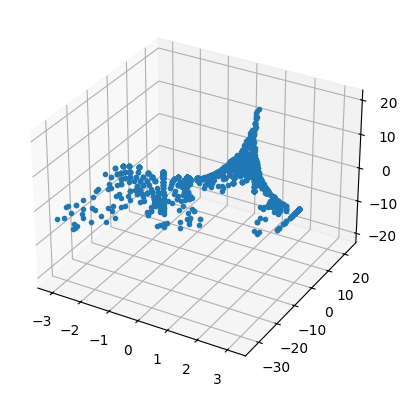

In [5]:
EXP_NAME = "P0_C0"
dataset_path = f"/home/jmartinsaquet/Documents/code/IA2_codes/clone/datasets/{EXP_NAME}.csv"

xd, yd, _, traj = read_dataset(dataset_path, "dir", with_angle=True, lag_amout=0)

ax = plt.figure().add_subplot(projection='3d')

ax.plot(xd['d_angle'], xd['dx'], xd['dy'], '.')



            dx        dy
0    -0.993208 -0.116352
1    -2.979555 -0.349642
2    -5.348092 -0.630801
3    -4.966970 -0.573771
4    -8.190794 -0.954406
...        ...       ...
1231  1.206723  0.737442
1232  0.816968  0.576683
1233  0.000000  0.000000
1234  0.000000  0.000000
1235  0.000000  0.000000

[1236 rows x 2 columns]


np.float64(23.04088437845163)

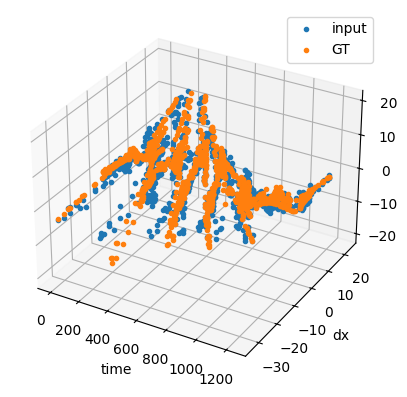

In [6]:
print(yd)


n = [i for i in xd.index]
ax = plt.figure().add_subplot(projection='3d')

ax.plot(n, xd['dx'], xd['dy'], '.', label = 'input')
ax.plot(n, yd['dx'], yd['dy'], '.', label = 'GT')
ax.set_xlabel("time")
ax.set_ylabel("dx")
ax.set_zlabel("dy")
ax.legend()

np.max(yd)

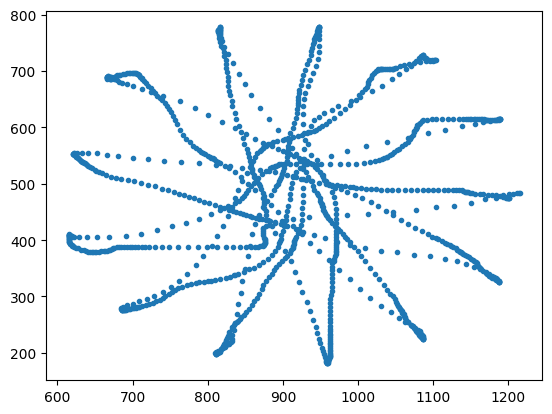

In [7]:
plt.plot(traj['x'], traj["y"], '.')

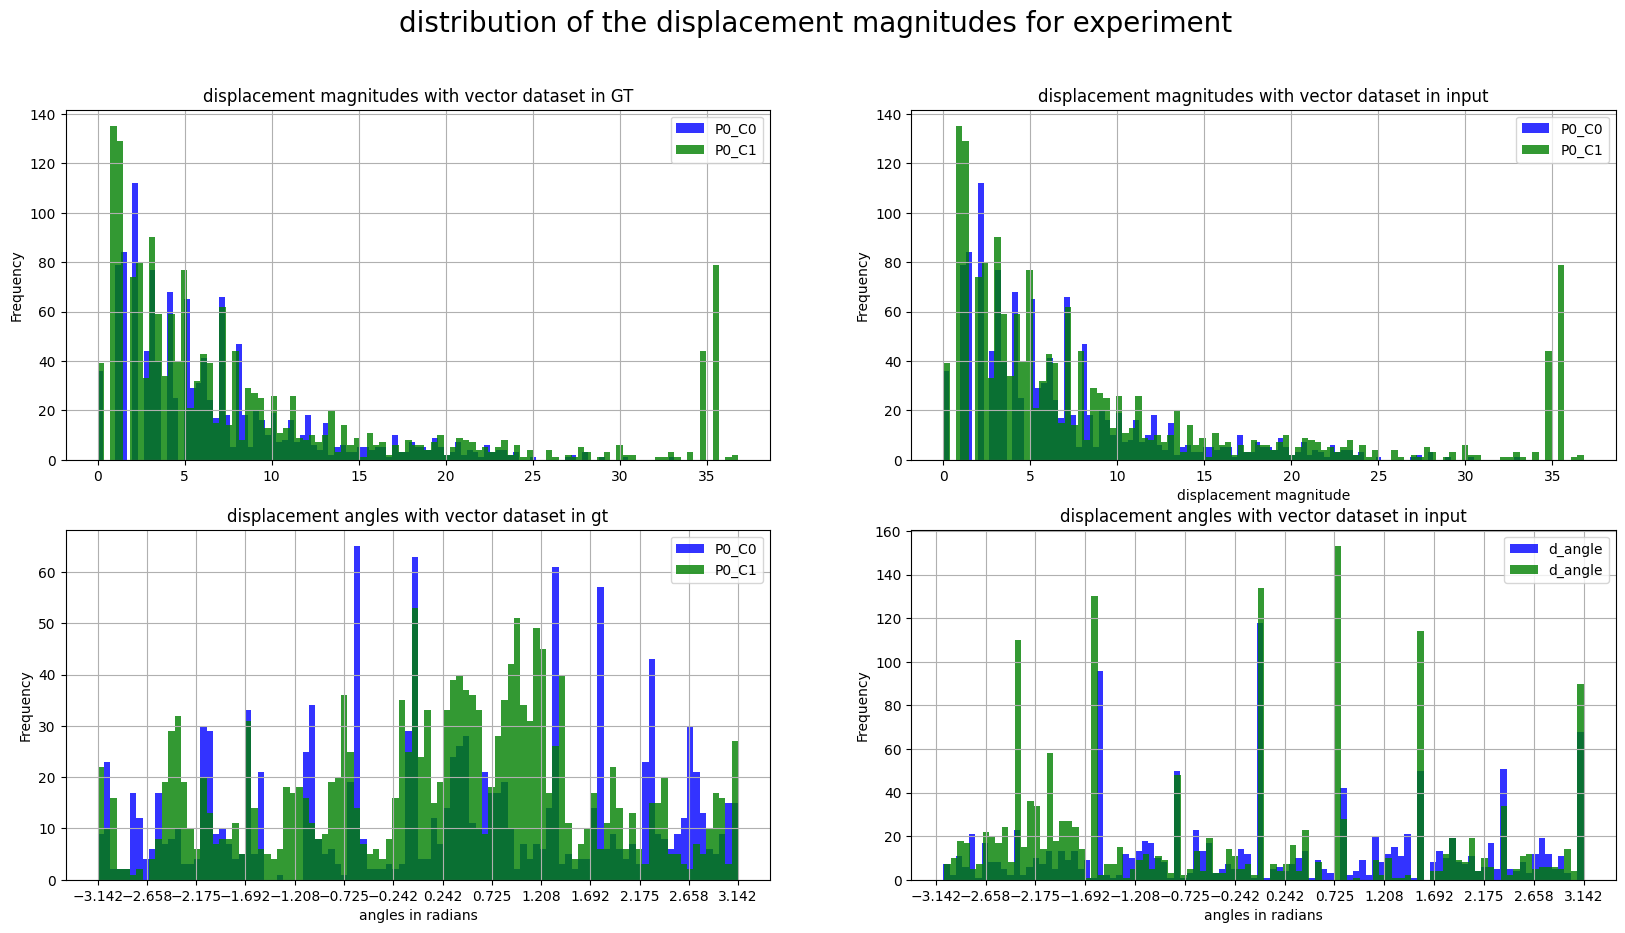

In [8]:
fig, axs = plt.subplots(2,2, figsize=(20,10))
fig.suptitle(f'distribution of the displacement magnitudes for experiment {EXP_NAME}', fontsize=20)


def draw_hist(axs, xd, yd, label, color = 'g'):

    a = 0.8 # alpha
    bins = 100
    mag_gt_df = np.sqrt(yd['dx']**2 + yd['dy']**2)
    axs[0,0] = mag_gt_df.plot.hist(alpha=a, bins=bins, ax=axs[0,0], color=color, label=label)
    axs[0,0].set_title("displacement magnitudes with vector dataset in GT")
    axs[0,1].set_xlabel("displacement magnitude")

    mag_in_df = np.sqrt(xd['dx']**2 + xd['dy']**2)
    axs[0,1] = mag_in_df.plot.hist(alpha=a, bins=bins, ax=axs[0,1], color=color, label=label)
    axs[0,1].set_title("displacement magnitudes with vector dataset in input")
    axs[0,1].set_xlabel("displacement magnitude")

    axs[1,1] = xd.plot.hist(column=['d_angle'], alpha=a, bins=bins, ax=axs[1,1], color=color, label=label)
    axs[1,1].set_title("displacement angles with vector dataset in input")
    axs[1,1].set_xlabel("angles in radians")


    ang_gt_df = np.atan2(yd['dy'], yd['dx'])
    axs[1,0] = ang_gt_df.plot.hist(alpha=a, bins=bins, ax=axs[1,0], color=color, label=label)
    axs[1,0].set_title("displacement angles with vector dataset in gt")
    axs[1,0].set_xlabel("angles in radians")

    for ax in axs.flatten():
        ax.grid(True)
        ax.legend()

    N = 13
    custom_ticks = [-np.pi + i*np.pi/(N/2) for i in range(0, N+1)]
    custom_tick_labels = ['$0$', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$']

    for ax in axs[1].flatten():
        ax.set_xticks(custom_ticks)



fig.suptitle(f'distribution of the displacement magnitudes for experiment', fontsize=20)

experiment_to_dive_in = ['P0_C0', 'P0_C1']
color = ['b', 'g']
for exp, c in zip(experiment_to_dive_in, color):
    dataset_path = f"/home/jmartinsaquet/Documents/code/IA2_codes/clone/datasets/{exp}.csv"
    xe, ye, _, _ = read_dataset(dataset_path, "dir", with_angle=True, lag_amout=0)
    draw_hist(axs, xe, ye, exp, c)

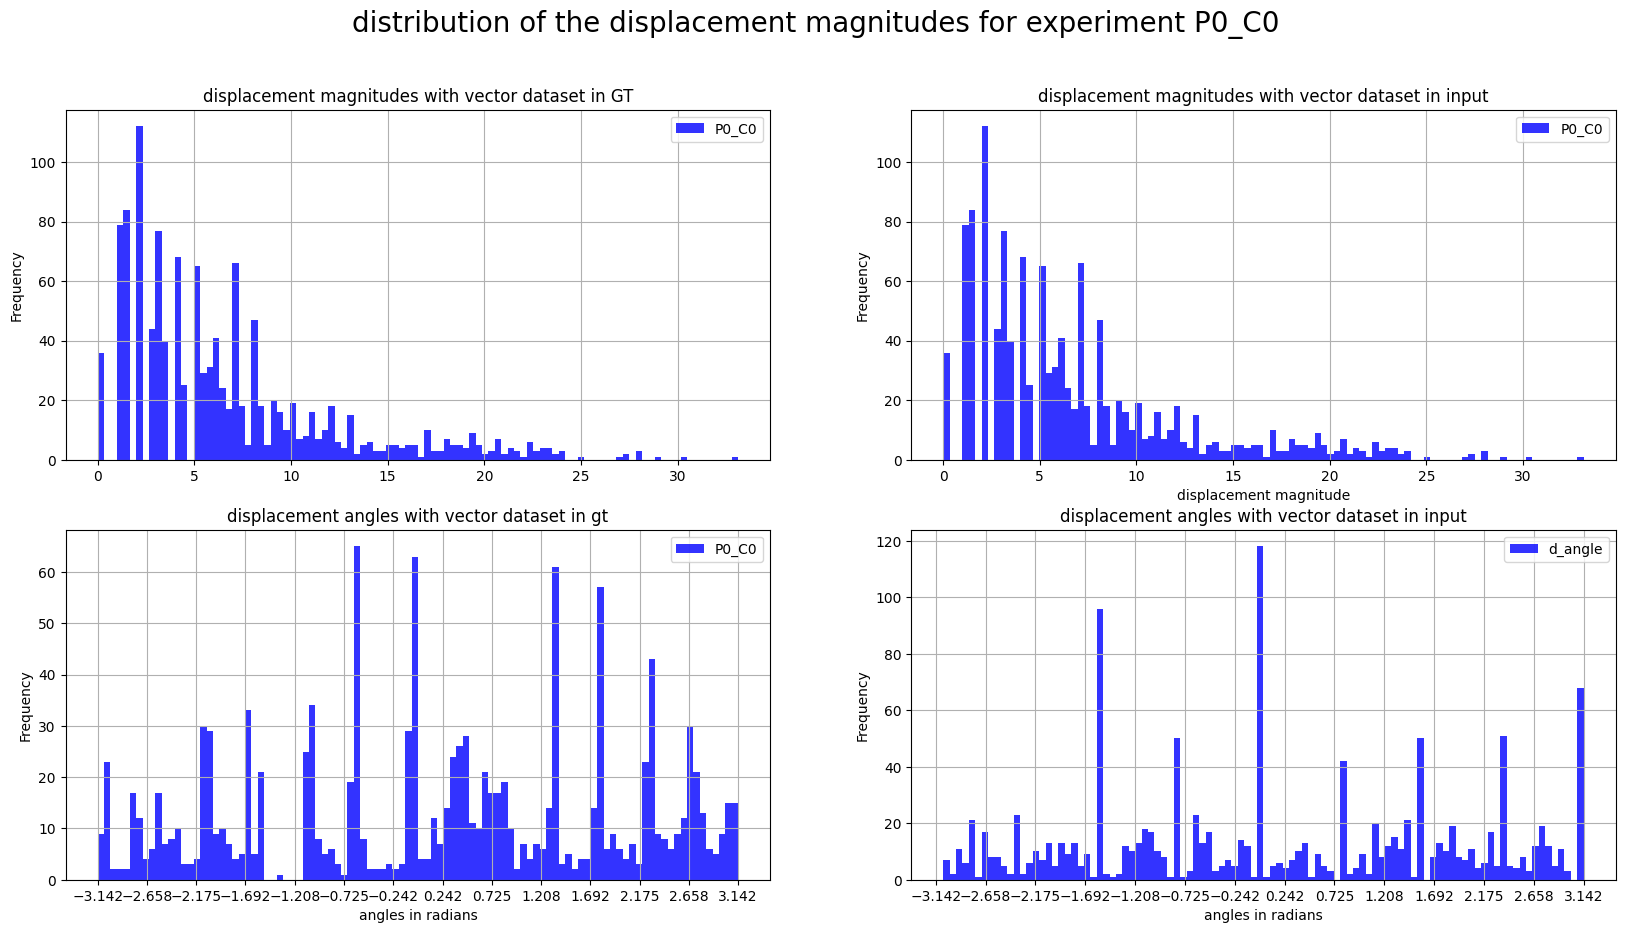

In [9]:
fig, axs = plt.subplots(2,2, figsize=(20,10))
fig.suptitle(f'distribution of the displacement magnitudes for experiment {EXP_NAME}', fontsize=20)

experiment_to_dive_in = [ 'P0_C0']
color = ['b', 'g']
for exp, c in zip(experiment_to_dive_in, color):
    dataset_path = f"/home/jmartinsaquet/Documents/code/IA2_codes/clone/datasets/{exp}.csv"
    xe, ye, _ , _= read_dataset(dataset_path, "vec", with_angle=True, lag_amout=0)
    draw_hist(axs, xd, yd, exp, c)

,x_to,y_to
0,626.0,414.0
1,626.0,414.0
2,626.0,414.0
3,626.0,414.0
4,626.0,414.0
...,...,...
1231,1217.0,486.0
1232,1217.0,486.0
1233,1217.0,486.0
1234,1217.0,486.0


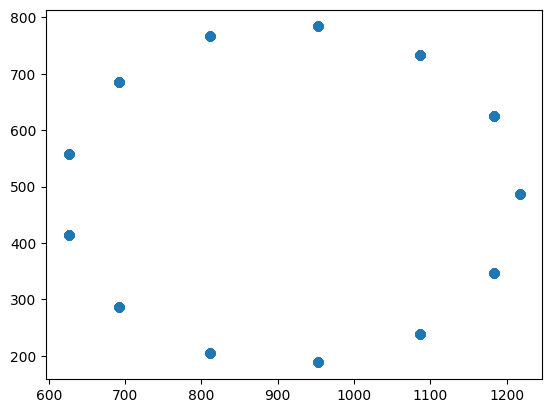

In [10]:
# draw targets
dataset_path = f"/home/jmartinsaquet/Documents/code/IA2_codes/clone/datasets/P0_C0.csv"
_, _, targets , _= read_dataset(dataset_path, "vec", with_angle=True, lag_amout=0)


plt.plot(targets['x_to'], targets['y_to'], 'o')
targets